# Benchmarking Our Algorithm against others

In [6]:
import sys
sys.path.append('../')
from panav.environment.env import MultiTunnelEnv,DefaultEmtpyEnv
from panav.hybrid import HybridGraph
from panav.util import flowtime,makespan
from panav.PBS.PBS import PBS
from panav.TrafficAwarePlanning import TAHP
from panav.sequential import sequential_planning
from panav.SAMP.solvers import Tube_Planning, Simple_MILP_Planning
from panav.viz import draw_hybrid,draw_env
from panav.environment.utils import box_2d_center

from time import time
import pickle as pkl
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


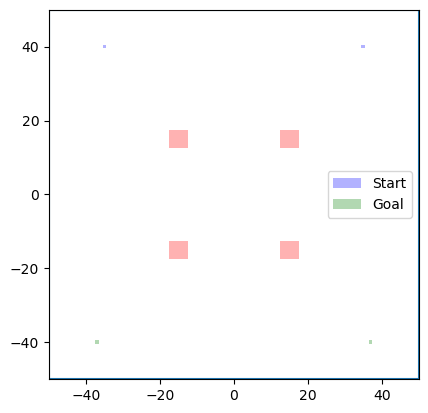

In [11]:

def arena_mockup(N,bloating_r):
       env = DefaultEmtpyEnv(limits=[(-50,50),(-50,50)],N_agent=N)
       obs = [box_2d_center(np.array((-15,-15)),5),
              box_2d_center(np.array((-15,15)),5),
              box_2d_center(np.array((15,-15)),5),
              box_2d_center(np.array((15,15)),5),
              ]

       env.obstacles+=obs
       return HybridGraph(env,bloating_r)

bloating_r = 0.5
N = 2
HG = arena_mockup(N,bloating_r)
draw_env(HG.env,show_agent_ID=False)


In [15]:

bloating_r = 0.5
vmax = 1.0

n_agents = list(range(10,51,10))

TIMEOUT = 100 # timeout

# Algorithms
algs = {
        "S2M2": lambda hg: PBS(hg.env,vmax=vmax,bloating_r=bloating_r,low_level_planner="Simple_MILP_Planning",TIMEOUT=TIMEOUT)[0],
        "PBS_Tube": lambda hg: PBS(hg.env,vmax=vmax,bloating_r=bloating_r,low_level_planner="Tube_Planning")[0],
        "TAHP": lambda hg: TAHP(hg,vmax=vmax,bloating_r=bloating_r,TIMEOUT=TIMEOUT),
        "Seq_Tube": lambda hg: sequential_planning(Tube_Planning,hg.env,vmax,bloating_r,TIMEOUT=TIMEOUT),
        # "Seq_Temp_Obs": lambda hg: sequential_planning(Simple_MILP_Planning,hg.env,vmax,bloating_r,TIMEOUT=TIMEOUT)
        }

timeouted = {alg:False for alg in algs}



results = []

env_name = "Arena_Mockup"


# Experiments
for i in range(len(n_agents)):
    N = n_agents[i]
   
    HG = arena_mockup(N,bloating_r)

    for name,alg in algs.items():

        if timeouted[name]:
            continue
        
        print("Alg:", name, "N agent:",N)

        result = {}
        
        t0 = time()
        plan = alg(HG)
        t = time()-t0
        
        result['plan'] = plan
        result['time'] = t

        result['N_agent'] = N
        result['alg_name'] = name
        # Save checkpoint data

        result["TIMEOUT"]=TIMEOUT
        result["HG"]=HG

        results.append(result)

        
        if t>TIMEOUT:
            timeouted[name] = True
            print("Time out for algorithm", name, "N agent = ", N)

    # Save checkpoint data
    with open("./data/{}.pkl".format(env_name),'wb') as fp:
        pkl.dump(results,fp)


Alg: S2M2 N agent: 10
Alg: PBS_Tube N agent: 10
Alg: TAHP N agent: 10
Alg: Seq_Tube N agent: 10
Alg: S2M2 N agent: 20
Skipping ij (3, 4) prev_ordering [(1, 0), (2, 1), (7, 2), (2, 11), (3, 4), (3, 5), (6, 3), (6, 14)]
Skipping ij (4, 3) prev_ordering [(1, 0), (2, 1), (7, 2), (2, 11), (3, 4), (3, 5), (6, 3), (6, 14)]
Skipping ij (5, 14) prev_ordering [(1, 0), (2, 1), (7, 2), (2, 11), (3, 4), (3, 5), (3, 6), (10, 1), (13, 3), (3, 11), (5, 14), (6, 15), (7, 8)]
Skipping ij (14, 5) prev_ordering [(1, 0), (2, 1), (7, 2), (2, 11), (3, 4), (3, 5), (3, 6), (10, 1), (13, 3), (3, 11), (5, 14), (6, 15), (7, 8)]
Time out for algorithm S2M2 N agent =  20
Alg: PBS_Tube N agent: 20
Alg: TAHP N agent: 20
Alg: Seq_Tube N agent: 20
Alg: PBS_Tube N agent: 30
Time out for algorithm PBS_Tube N agent =  30
Alg: TAHP N agent: 30
Alg: Seq_Tube N agent: 30
Alg: TAHP N agent: 40
Alg: Seq_Tube N agent: 40
Alg: TAHP N agent: 50
Alg: Seq_Tube N agent: 50


In [13]:
results

[{'plan': [(array([ -0.     ,  74.95332, 156.62415]),
    array([[ 35.  , -18.  , -37.25],
           [ 40.  ,  18.  , -39.75]])),
   (array([ -0.     ,  81.37541, 158.8036 ]),
    array([[ 35.  ,  18.  , -36.75],
           [ 20.  , -18.  , -20.25]])),
   (array([ -0.     , 101.46982]),
    array([[ 35.  , -36.75],
           [ -0.  ,  -0.25]])),
   (array([ -0.     ,  74.95332, 128.33988]),
    array([[ 35.  , -18.  , -36.75],
           [-20.  , -18.  ,  19.75]])),
   (array([ -0.     ,  79.25409, 162.17709]),
    array([[ 35.     , -18.     , -36.75   ],
           [-40.     , -18.88542,  39.75   ]])),
   (array([ -0.     ,  82.02439, 168.09678]),
    array([[-35.     , -24.11237,  36.75   ],
           [ 40.     , -18.     , -40.25   ]])),
   (array([ -0.     ,  74.95332, 128.33988]),
    array([[-35.  ,  18.  ,  36.75],
           [ 20.  ,  18.  , -19.75]])),
   (array([ -0.     , 101.96982, 207.98765]),
    array([[-35.     , -38.21593,  36.75   ],
           [ -0.     , -11.387